In [71]:
import numpy as np
import matplotlib.pyplot as plt

pi = np.pi

In [72]:
# Function for testing and part 3
f = lambda t : np.sin(2*pi*t - 5)/np.sqrt(abs(t - pi/20))

In [73]:
# Problem 8.42 part 1
def sampling(f, n):
    """
    Parameters:
        f (lambda function): function to sample on [0, 1)]
        n (int): 2**n is number of sample points
    Return:
        ndarray of f at points k/2^n for k in {0, ..., 2^n - 1}
    """

    # k values
    k = np.arange(2**n)
    
    # x = k/2^n values
    x = k/2**n
    
    return f(x)
    

In [74]:
# Show your part 1 works
print('n=2:\n\t', sampling(f, 2))
print('n=4:\n\t', sampling(f, 4))

n=2:
	 [ 2.41949302  0.93056344 -1.637524   -0.36838612]
n=4:
	 [ 2.41949302  3.23369233  4.90565414  3.60655016  0.93056344 -0.26607236
 -1.02284178 -1.4680042  -1.637524   -1.56186943 -1.28447497 -0.86370236
 -0.36838612  0.12956681  0.56353284  0.87996982]


In [75]:
# Prob 8.42 part 2
def haar_wavelets(a, t):
    """
    Parameters:
        a (ndarray): array of coefficients
        t (float in [0, 1)): value in domain
    Return:
        Sum(k=0 to 2^n - 1, a_k * son(n, k)(t))
        i.e. value of the Haar son corresponding to the interval where t is
    """

    # 2^n
    num_pts = len(a)

    # floor(2^n * t) gets k index of each point
    k = np.floor(num_pts * t).astype(int)
    
    return a[k]

In [76]:
# Show your part 2 works
print('x=0:\t', haar_wavelets(sampling(f, 2), 0))
print('x=0.24:\t', haar_wavelets(sampling(f, 2), 0.24))
print('x=0.25:\t', haar_wavelets(sampling(f, 2), 0.25))
print('x=0.26:\t', haar_wavelets(sampling(f, 2), 0.26))

print('x=[0, 0.24, 0.25, 0.26]:\t', haar_wavelets(sampling(f, 2), np.array([0, 0.24, 0.25, 0.26])))

x=0:	 2.4194930235571572
x=0.24:	 2.4194930235571572
x=0.25:	 0.9305634392543783
x=0.26:	 0.9305634392543783
x=[0, 0.24, 0.25, 0.26]:	 [2.41949302 2.41949302 0.93056344 0.93056344]


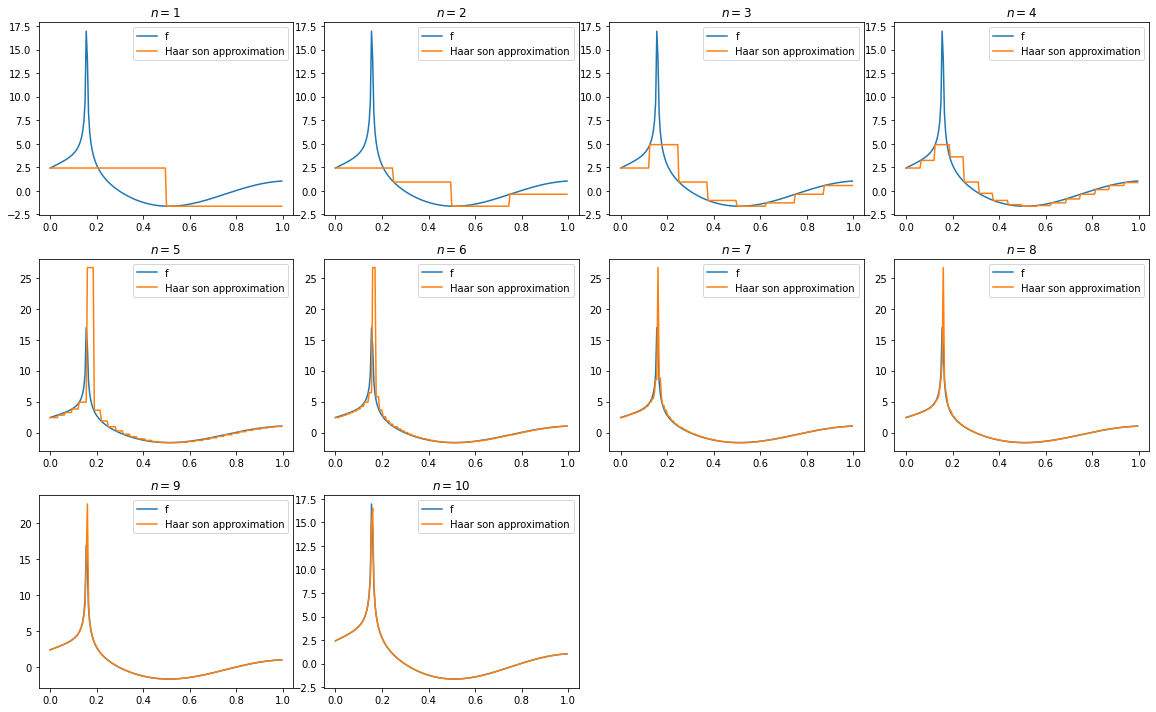

In [77]:
# Prob 8.42 part 3
def exercise8_42():
    """Plot parts 1 and 2 for n in {1, ..., 10}."""
    
    fig, axs = plt.subplots(3, 4, figsize=(16, 10))
    axs = np.ravel(axs)

    x = np.linspace(0, 1, 200, endpoint=False)

    for n, ax in zip(range(1, 11), axs):
        # Plot f and Haar son approximation
        ax.plot(x, f(x), label='f')
        ax.plot(x, haar_wavelets(sampling(f, n), x), label='Haar son approximation')
        
        # Plot properties
        ax.legend()
        ax.set_title(f'$n = {{{n}}}$')

    # Delete extra axs
    [plt.delaxes(ax) for ax in axs[-2:]]

    # Plot
    plt.tight_layout()
    plt.show()

exercise8_42()